In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [219]:
data = dataset[:,12].reshape(-1,1)
np.shape(dataset)

(506, 13)

In [220]:
target = boston.target.reshape(-1,1)
np.shape(target)

(506, 1)

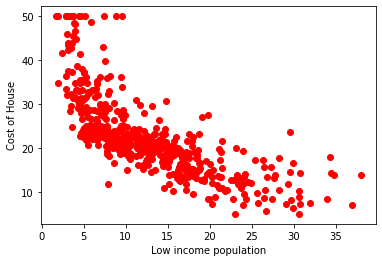

In [221]:
plt.scatter(data, target, color = 'red')
plt.xlabel('Low income population')
plt.ylabel('Cost of House')
plt.show()

#### LINEAR REGRESSION

In [279]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [280]:
pred = reg.predict(data)

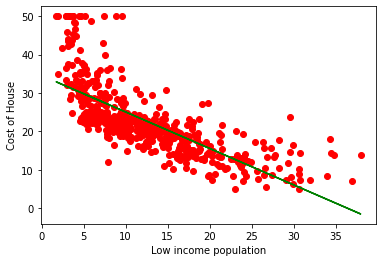

In [281]:
plt.scatter(data, target, color = 'red')
plt.plot(data, pred, color = 'green')
plt.xlabel('Low income population')
plt.ylabel('Cost of House')
plt.show()

In [282]:
#polynomial model
from sklearn.preprocessing import PolynomialFeatures

#merging models
from sklearn.pipeline import make_pipeline

In [283]:
model = make_pipeline(PolynomialFeatures(3), reg)

In [284]:
model.fit(data, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [285]:
pred = model.predict(data)

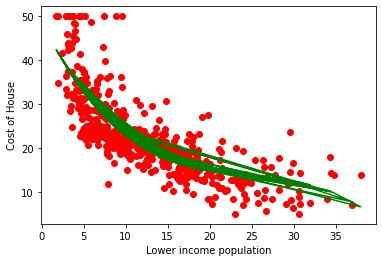

In [286]:
plt.scatter(data, target, color = 'red')
plt.plot(data, pred, color = 'green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [287]:
from sklearn.metrics import r2_score

In [288]:
r2_score(pred, target)

0.4798911810273917

#### LASSO

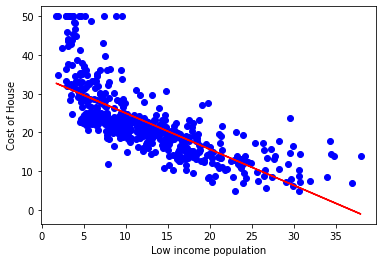

In [290]:
from sklearn.linear_model import Lasso
reg = Lasso()
reg.fit(data, target)
pred = reg.predict(data)
plt.scatter(data, target, color = 'blue')
plt.plot(data, pred, color = 'red')
plt.xlabel('Low income population')
plt.ylabel('Cost of House')
plt.show()

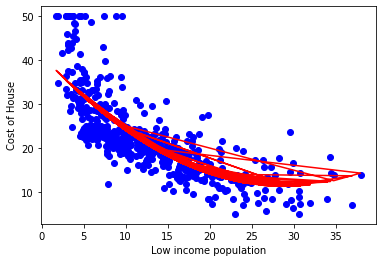

In [292]:
#polynomial model
from sklearn.preprocessing import PolynomialFeatures
#merging models
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), reg)
model.fit(data, target)

pred = model.predict(data)

plt.scatter(data, target, color = 'blue')
plt.plot(data, pred, color = 'red')
plt.xlabel('Low income population')
plt.ylabel('Cost of House')
plt.show()

In [293]:
from sklearn.metrics import r2_score
r2_score(pred, target)

0.38256978656653007